# Feed Forward Neural Network
In this tutorial, we are going to implement a feed forward neural network to classify mnist dataset.

### Import library and load mnist dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline


mnist = input_data.read_data_sets("./mnist", one_hot=True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

print "x_train: ", x_train.shape
print "y_train: ", y_train.shape
print "x_test: ", x_test.shape
print "y_test: ", y_test.shape

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
x_train:  (55000, 784)
y_train:  (55000, 10)
x_test:  (10000, 784)
y_test:  (10000, 10)


### Data sanity check
Before implementing neural network, let's do sanity check.

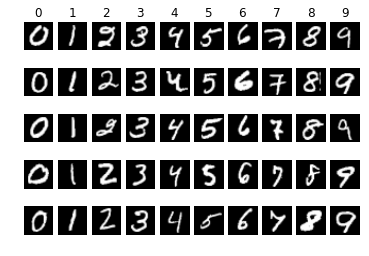

In [2]:
classes = np.argmax(y_train, 1)

for i in range(10):
    idxs = (classes == i)
    # get 10 images for class i
    images = x_train[idxs][0:10]
        
    for j in range(5):   
        plt.subplot(5, 10, i + j*10 + 1)
        plt.imshow(images[j].reshape(28, 28), cmap='gray')
        # print a title only once for each class
        if j == 0:
            plt.title(i)
        plt.axis('off')
plt.show()

### Forward layer

To implement a fully connected layer, we simply used [tf.matmul](https://www.tensorflow.org/versions/r0.11/api_docs/python/math_ops.html#matmul) function for 2D matrix multiplication . In this code, we used [tf.variable_scope](https://www.tensorflow.org/versions/r0.11/api_docs/python/state_ops.html#variable_scope) and [tf.get_variable](https://www.tensorflow.org/versions/r0.11/api_docs/python/state_ops.html#get_variable) functions for encapsulation and effective management for the names of tensor variables. Also, In this tutorial, we simply choosed [tf.random_uniform_initializer](https://www.tensorflow.org/versions/r0.11/api_docs/python/state_ops.html#random_uniform_initializer) as our variable initializer. There are some other initializers such as [tf.random_normal_initializer](https://www.tensorflow.org/versions/r0.11/api_docs/python/state_ops.html#random_normal_initializer) and [tf.truncated_normal_initializer](https://www.tensorflow.org/versions/r0.11/api_docs/python/state_ops.html#truncated_normal_initializer). 

In [3]:
def affine_forward(x, dim_in, dim_out, name):
    with tf.variable_scope(name) as scope:
        # create variables
        w = tf.get_variable('w', shape=[dim_in, dim_out], 
                            initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
        b = tf.get_variable('b', shape=[dim_out])
        
        # create operations
        out = tf.matmul(x, w) + b
        
        return out    

### Neural network

In [4]:
# Create model
def neural_network(x, dim_in=784, dim_h=500, dim_out=10):
    # 1st hidden layer with ReLU
    h1 = affine_forward(x, dim_in, dim_h, name='h1')
    h1 = tf.nn.relu(h1)
    
    # 2nd hidden layer with ReLU
    h2 = affine_forward(h1, dim_h, dim_h, name='h2')
    h2 = tf.nn.relu(h2)
    
    # output layer with linear
    out = affine_forward(h2, dim_h, dim_out, name='out')
    
    return out

### Place Holder

In [5]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

### Construct graph

In [6]:
# Construct model with default value
out = neural_network(x)

In [7]:
# loss and optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(out, y))
optimizer = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(loss)

In [8]:
# Test model
pred = tf.argmax(out, 1)
target = tf.argmax(y, 1)

correct_pred = tf.equal(pred, target)
incorrect_pred = tf.not_equal(pred, target)
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Session: Training phase

Epoch 1, Loss: 0.564
Epoch 2, Loss: 0.110
Epoch 3, Loss: 0.064
Epoch 4, Loss: 0.045
Epoch 5, Loss: 0.032
Epoch 6, Loss: 0.024
Epoch 7, Loss: 0.017
Epoch 8, Loss: 0.014
Epoch 9, Loss: 0.011
Epoch 10, Loss: 0.010
Epoch 11, Loss: 0.007
Epoch 12, Loss: 0.006
Epoch 13, Loss: 0.006
Epoch 14, Loss: 0.006
Epoch 15, Loss: 0.005
Finished Training!
Test Accuracy: 0.9807
Incorrect Case


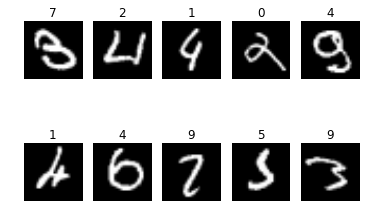

In [9]:
batch_size = 100

# launch the graph
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config) as sess:
    # initialize tensor variables
    tf.initialize_all_variables().run()
    # training cycle
    for epoch in range(15):
        avg_loss = 0.
        n_iters_per_epoch = int(mnist.train.num_examples / batch_size)
        # loop over all batches
        for i in range(n_iters_per_epoch):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            # run optimization op (backprop) and loss op (to get loss value)
            _, c = sess.run([optimizer, loss], feed_dict={x: x_batch, y: y_batch})
            # compute average loss
            avg_loss += c / n_iters_per_epoch
        print "Epoch %d, Loss: %.3f"% (epoch+1, avg_loss)
    print "Finished Training!"
    
    
    print "Test Accuracy:", sess.run(accuracy, {x: mnist.test.images, y: mnist.test.labels})
    p, incorrect = sess.run([pred, incorrect_pred], {x: mnist.test.images, y: mnist.test.labels})
    images = x_test[incorrect][0:10]
    print "Incorrect Case"
    for j in range(10):   
        plt.subplot(2, 5, j+1)
        plt.imshow(images[j].reshape(28, 28), cmap='gray')
        plt.title(p[j])
        plt.axis('off')
    plt.show()